In [17]:
import pandas as pd
import numpy as np

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark", {'axes.grid' : False})

In [18]:
df = pd.read_csv("../datasets/weatherAUS_clean.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### ANOVA

One way ANOVA, to see if WindGustDir has an effect on MaxTemp

<AxesSubplot: xlabel='WindGustDir', ylabel='MaxTemp'>

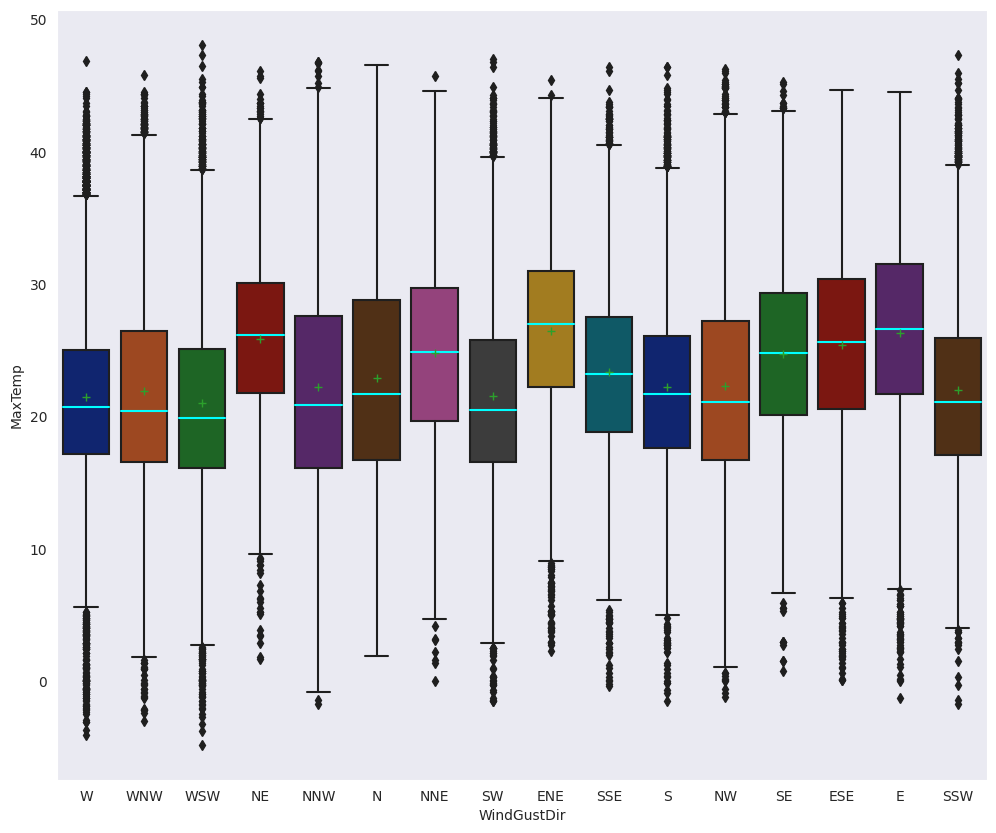

In [19]:
# checking for normality for each sample of MaxTemp categorized by WindGustDir

wgd_vals = df.WindGustDir.unique()
wgd_samples = []

for wgd in wgd_vals:
  wgd_samples.append(df[df['WindGustDir'] == wgd]['MaxTemp'])

rcParams['figure.figsize'] = 12, 10
sns.boxplot(data=df, y='MaxTemp', x="WindGustDir",
            palette='dark', medianprops={'color': 'cyan'}, showmeans=True, meanprops={"marker": "+"})

In [20]:
from scipy.stats import f_oneway

f_oneway(*wgd_samples)

F_onewayResult(statistic=655.303250231724, pvalue=0.0)

Observing the p-value & F-statistic, with degrees of freedom for within & between samples, 15 & ~19000, we reject the null hypothesis that MaxTemp has no effect on the Rainfall with a confidence of 5%.

Now, a two-way ANOVA to see the effects of WindDir9am & WindDir3pm on Evaporation.

In [21]:
from statsmodels.formula.api import ols

formula = "Evaporation ~ C(WindDir9am) + C(WindDir3pm)"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Evaporation   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:01:18   Log-Likelihood:            -3.6451e+05
No. Observations:              142193   AIC:                         7.291e+05
Df Residuals:                  142162   BIC:                         7.294e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9220      0.045    132.444      0.000       5.834       6.010
C(WindDir9am)[T.ENE]    -0.0925      0.049     -1.894      0.058      -0.188       0.003
C(WindDir9am)[T.ESE]     0.0174      0.049      0.354      0.723      -0.079       0.114
C(WindDir9am)[T.N]      -1.0461      0.040    -25.895      0.000      -1.125      -0.967
C(WindDir9am)[T.NE]     -0.4287      0.050     -8.634      0.000      -0.526      -0.331
C(WindDir9am)[T.NNE]    -0.4355      0.049     -8.804      0.000      -0.532      -0.339
C(WindDir9am)[T.NNW]    -1.2474      0.050    -25.064      0.000      -1.345      -1.150
C(WindDir9am)[T.NW]     -1.1637      0.049    -23.949      0.000      -1.259      -1.068
C(WindDir9am)[T.S]      -0.3743      0.049     -7.703      0.000      -0.469      -0.279
C(WindDir9am)[T.SE]      0.0232      0.047      0.493      0.622      -0.069       0.115
C(WindDir9am)[T.SSE]    -0.2183      0.048     -4.591      0.000      -0.312      -0.125
C(WindDir9am)[T.SSW]    -0.6791      0.050    -13.487      0.000      -0.778      -0.580
C(WindDir9am)[T.SW]     -1.0570      0.049    -21.588      0.000      -1.153      -0.961
C(WindDir9am)[T.W]      -1.2886      0.049    -26.263      0.000      -1.385      -1.192
C(WindDir9am)[T.WNW]    -1.2053      0.051    -23.681      0.000      -1.305      -1.106
C(WindDir9am)[T.WSW]    -1.1104      0.052    -21.526      0.000      -1.212      -1.009
C(WindDir3pm)[T.ENE]     0.3530      0.050      7.102      0.000       0.256       0.450
C(WindDir3pm)[T.ESE]     0.1074      0.049      2.206      0.027       0.012       0.203
C(WindDir3pm)[T.N]      -0.2608      0.050     -5.266      0.000      -0.358      -0.164
C(WindDir3pm)[T.NE]      0.0088      0.049      0.179      0.858      -0.088       0.106
C(WindDir3pm)[T.NNE]    -0.2406      0.053     -4.535      0.000      -0.345      -0.137
C(WindDir3pm)[T.NNW]    -0.3503      0.051     -6.894      0.000      -0.450      -0.251
C(WindDir3pm)[T.NW]     -0.1635      0.050     -3.284      0.001      -0.261      -0.066
C(WindDir3pm)[T.S]      -0.2464      0.048     -5.121      0.000      -0.341      -0.152
C(WindDir3pm)[T.SE]     -0.1228      0.044     -2.808      0.005      -0.209      -0.037
C(WindDir3pm)[T.SSE]    -0.1211      0.048     -2.504      0.012      -0.216      -0.026
C(WindDir3pm)[T.SSW]    -0.0837      0.050     -1.667      0.096      -0.182       0.015
C(WindDir3pm)[T.SW]      0.1359      0.049      2.802      0.005       0.041       0.231
C(WindDir3pm)[T.W]      -0.0742      0.048     -1.545      0.122      -0.168       0.020
C(WindDir3pm)[T.WNW]    -0.1216      0.050     -2.449      0.014      -0.219      -0.024
C(WindDir3pm)[T.WSW]     0.0658      0.048      1.357      0.175      -0.029       0.161
=========================================================

In [22]:
# Another library for ANOVA
import statsmodels.api as sm

table = sm.stats.anova_lm(model)
print(table)

                     df        sum_sq      mean_sq           F        PR(>F)
C(WindDir9am)      15.0  3.621679e+04  2414.452371  244.661625  0.000000e+00
C(WindDir3pm)      15.0  3.643407e+03   242.893784   24.612947  2.517987e-69
Residual       142162.0  1.402931e+06     9.868537         NaN           NaN


### Correlation

Now, we check the correlation between all the continuous variables

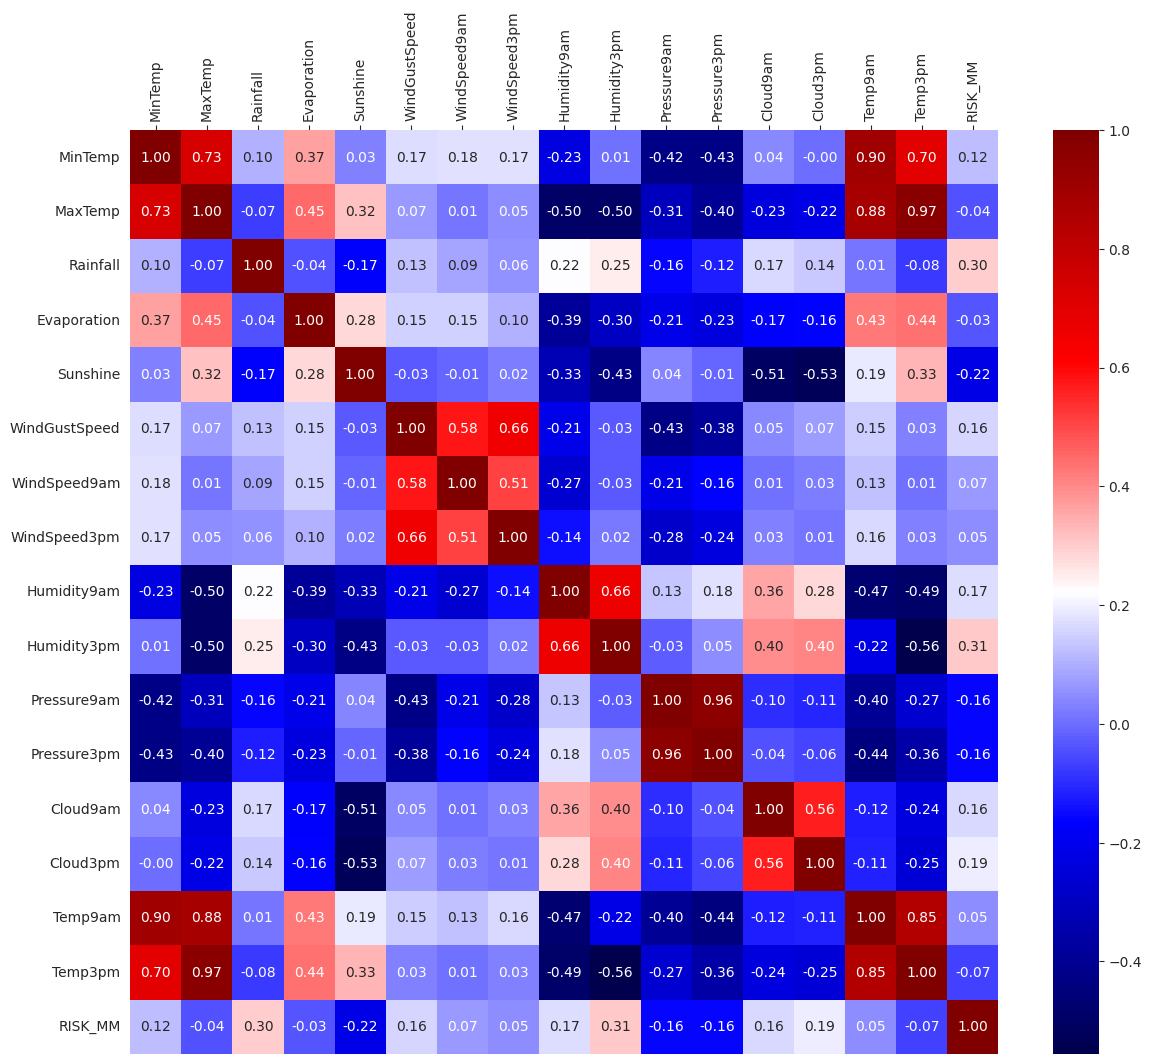

In [8]:
df_cont = df.loc[:, df.dtypes == np.float64]
rcParams['figure.figsize'] = 14, 12
ax = sns.heatmap(df_cont.corr(), cmap='seismic', annot=True, fmt='.2f')
ax.xaxis.tick_top()
ax.tick_params(axis='x', rotation=90)

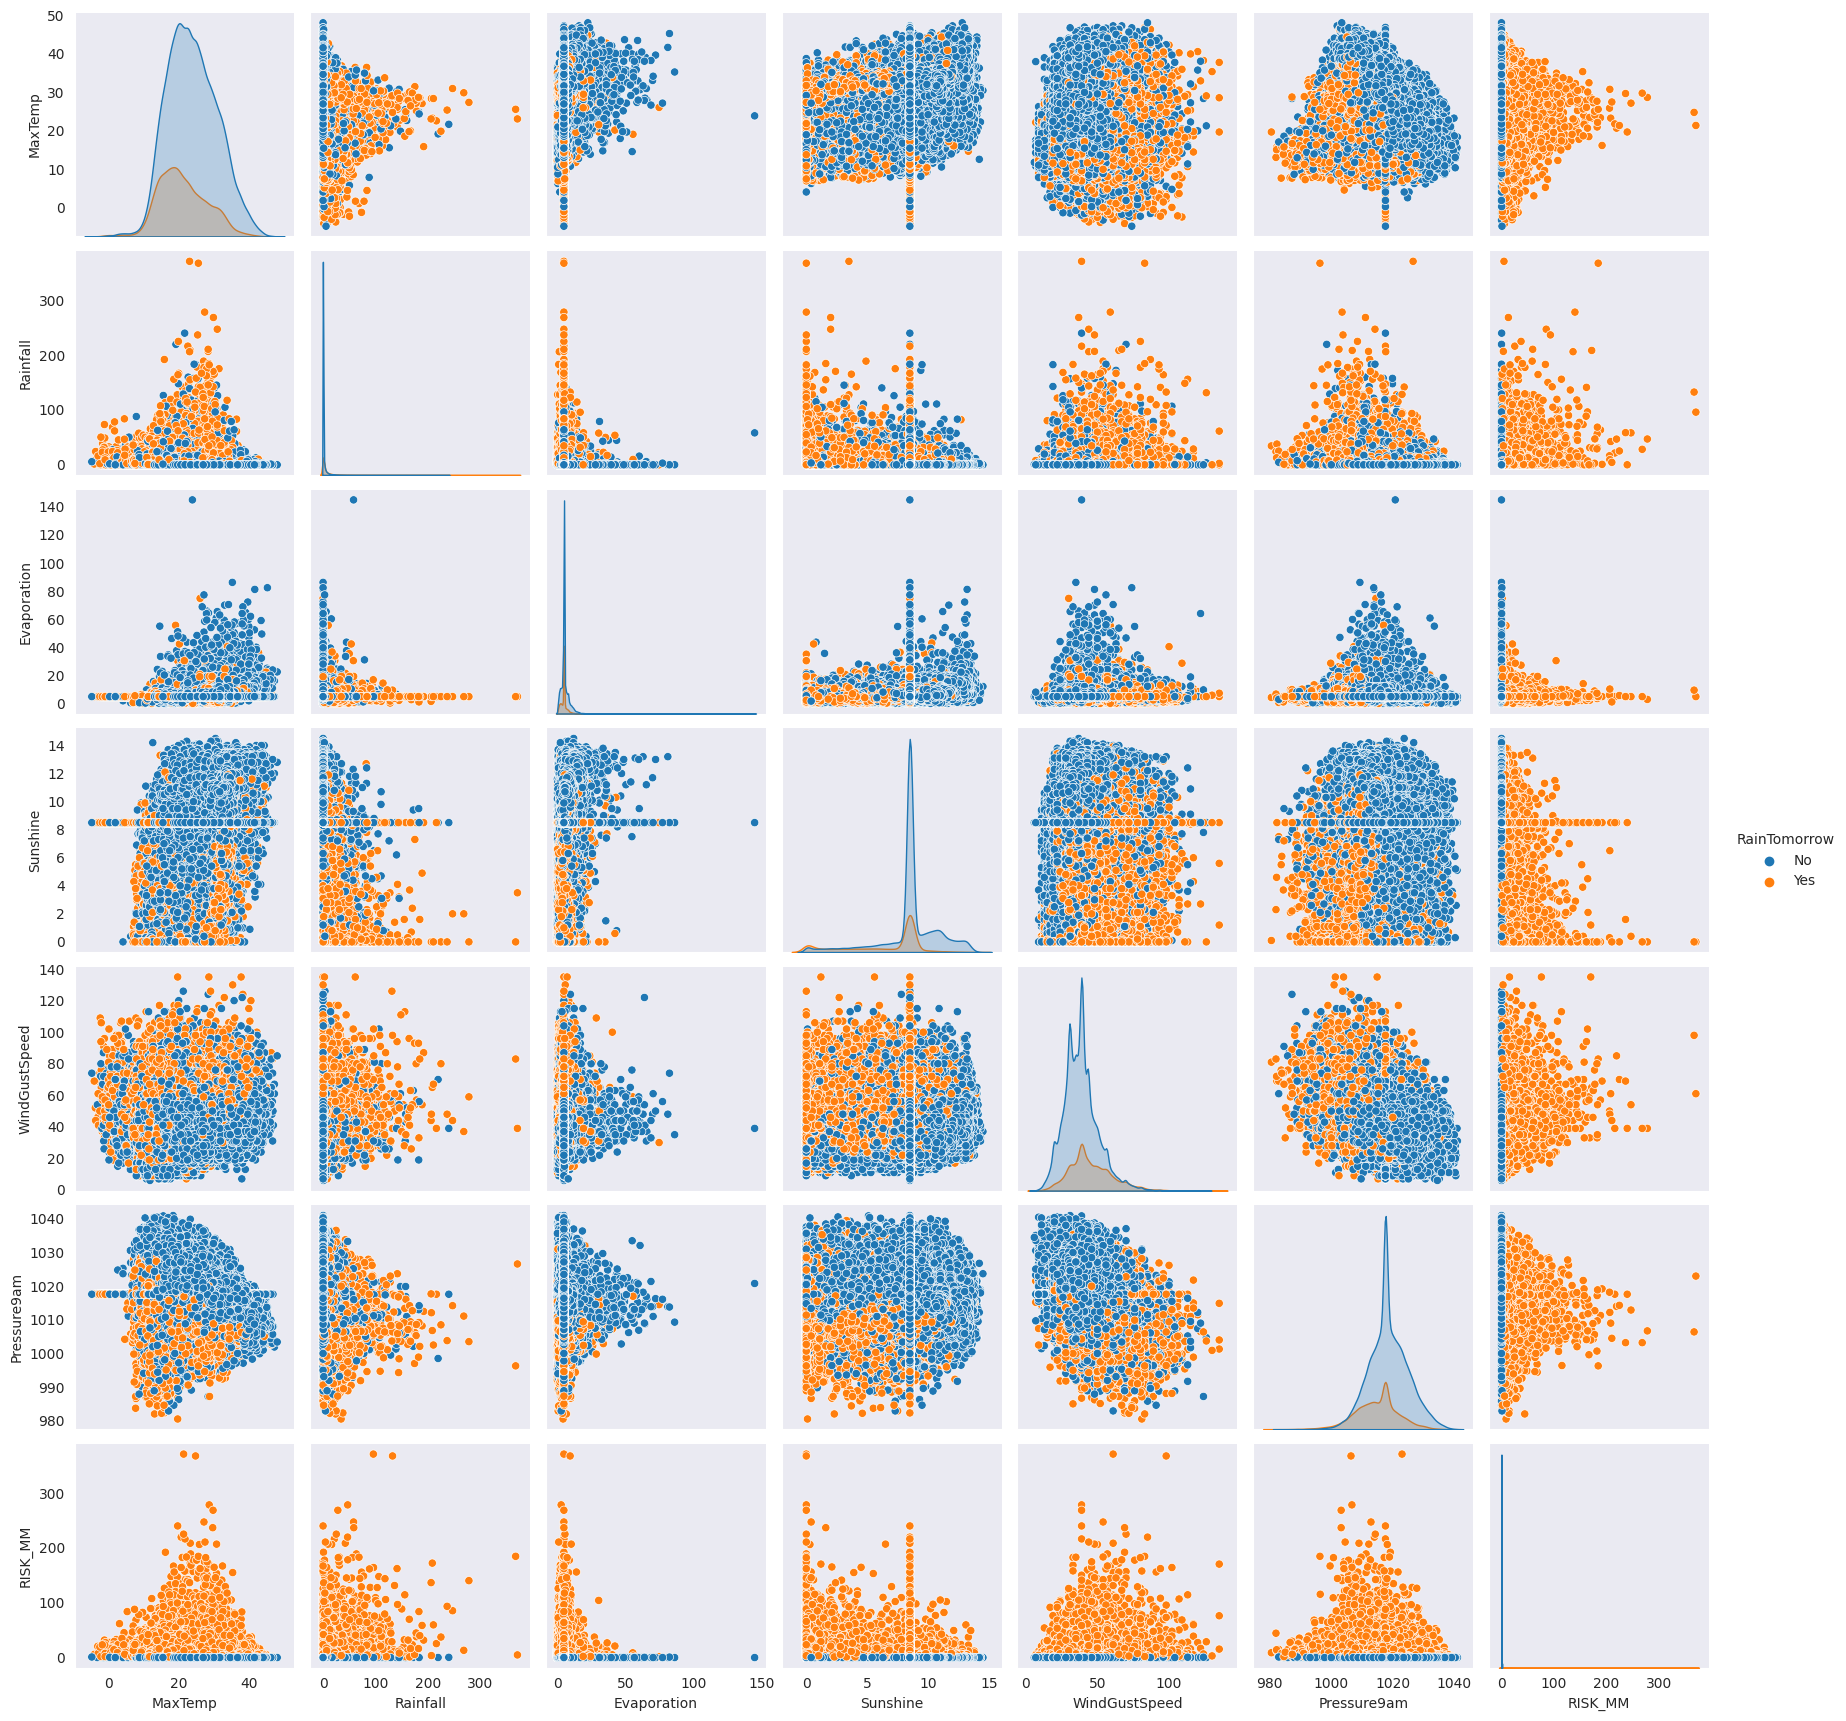

In [9]:
# keeping only one of the variables for highly correlated groups, along with the dependent variable RainTomorrow
uncor_vars = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'RISK_MM']
df_uncor = df[[*uncor_vars, 'RainTomorrow']]

# pairplots
sns.pairplot(data=df_uncor, x_vars=uncor_vars, y_vars=uncor_vars, hue='RainTomorrow')

### Generalized linear model

In [99]:
dft = df.copy()

# casting our target to int, and also RainToday as it intuitively seems to be a relevant predictor
dft['RainTomorrow'] = dft[['RainTomorrow']].replace(['Yes', 'No'], [1, 0])
dft['RainToday'] = dft[['RainToday']].replace(['Yes', 'No'], [1, 0])

# taking all continuous variables
dft_x = dft.loc[:, (dft.dtypes == np.float64) | (dft.dtypes == np.int64)]

First we check the normality & homoscedasticity of all the continuous variables involved through histograms

array([[<AxesSubplot: title={'center': 'MinTemp'}>,
        <AxesSubplot: title={'center': 'MaxTemp'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>,
        <AxesSubplot: title={'center': 'Evaporation'}>],
       [<AxesSubplot: title={'center': 'Sunshine'}>,
        <AxesSubplot: title={'center': 'WindGustSpeed'}>,
        <AxesSubplot: title={'center': 'WindSpeed9am'}>,
        <AxesSubplot: title={'center': 'WindSpeed3pm'}>],
       [<AxesSubplot: title={'center': 'Humidity9am'}>,
        <AxesSubplot: title={'center': 'Humidity3pm'}>,
        <AxesSubplot: title={'center': 'Pressure9am'}>,
        <AxesSubplot: title={'center': 'Pressure3pm'}>],
       [<AxesSubplot: title={'center': 'Cloud9am'}>,
        <AxesSubplot: title={'center': 'Cloud3pm'}>,
        <AxesSubplot: title={'center': 'Temp9am'}>,
        <AxesSubplot: title={'center': 'Temp3pm'}>],
       [<AxesSubplot: title={'center': 'RainToday'}>,
        <AxesSubplot: title={'center': 'RISK_MM'}>,
        <AxesSubpl

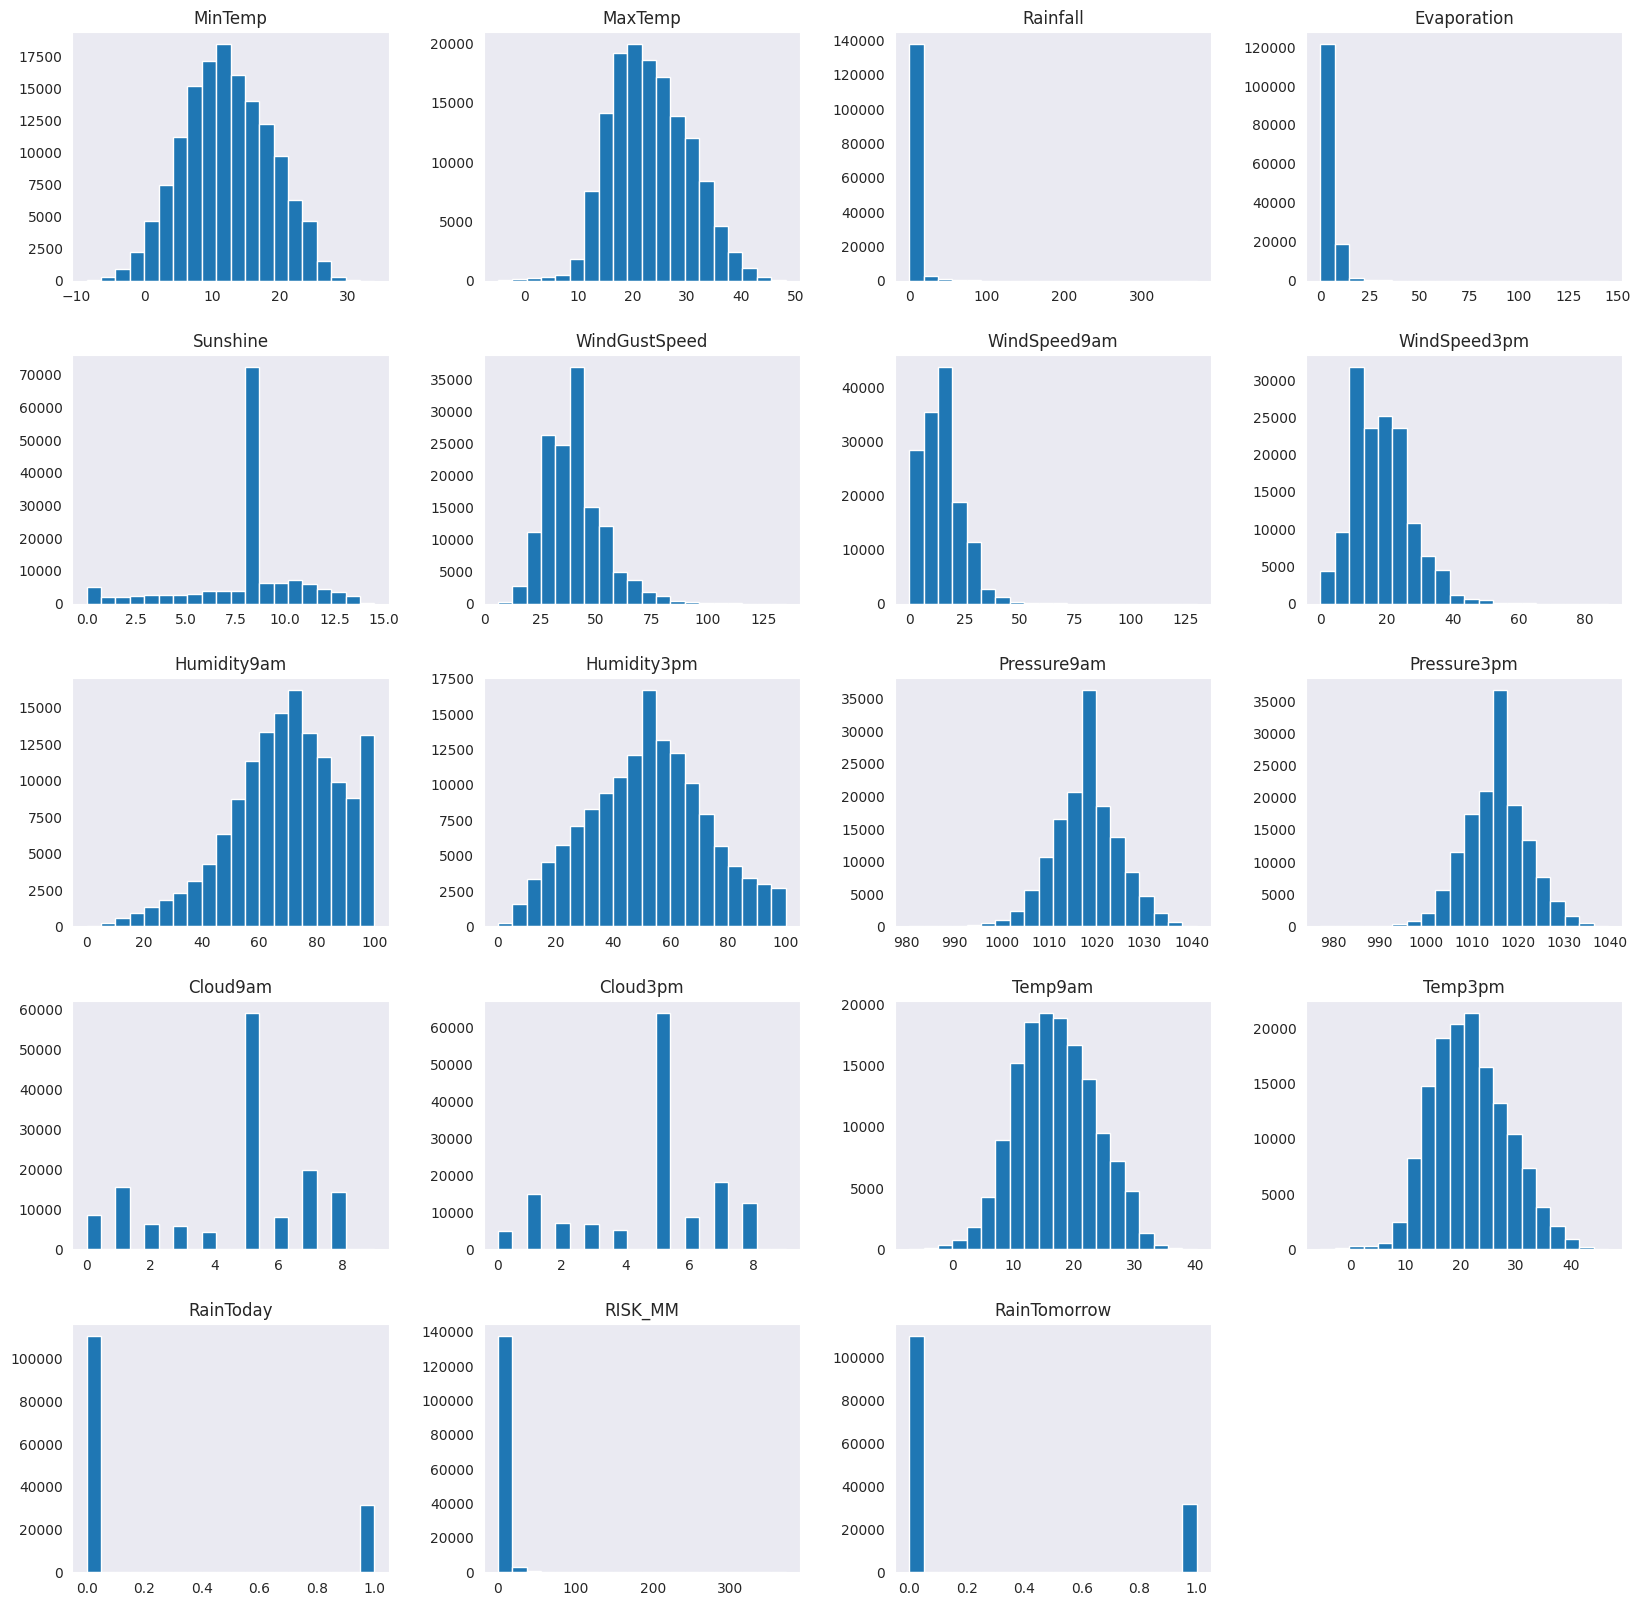

In [100]:
dft_x.hist(figsize=(20,20), bins=20, grid=False)

In [101]:
# omitted RISK_MM as it gave PerfectSeparationError with the GLM
dft_x = dft_x.drop(columns=['RISK_MM'])

Full model

In [102]:
from statsmodels.formula.api import glm


full_glm = glm(formula = 'RainTomorrow ~ MinTemp + MaxTemp + Rainfall + Evaporation + Sunshine + WindGustSpeed + WindSpeed9am + WindSpeed3pm + Humidity9am + Humidity3pm + Pressure9am + Pressure3pm + C(Cloud9am) + C(Cloud3pm) + Temp9am + Temp3pm + C(RainToday)',
  data=dft_x,
  family=sm.families.Binomial()
).fit()

print(f'Summary\n'
      f'{full_glm.summary()}\n'
      f'AIC: {full_glm.aic:.3f}'
)

Summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               142193
Model:                            GLM   Df Residuals:                   142159
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51376.
Date:                Sun, 05 Mar 2023   Deviance:                   1.0275e+05
Time:                        09:46:51   Pearson chi2:                 1.39e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2894
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             54.818

Now, we take the parameters with the lowest variation inflation factors, eliminating variables with highest VIF iteratively to create a linear model

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get vifs for a dataframe
def vifs(dfp):
  vif = pd.DataFrame()
  vif['variables'] = dfp.columns
  vif['VIF'] = [variance_inflation_factor(dfp.values, i) for i in range(dfp.shape[1])]
  return vif

# return reduced number of columns with vifs < param via iterative elimination
def vifs_till(dfp, mv):
  max_vif = np.Inf

  while True:
    viff = vifs(dfp)
    max_idx = np.argmax(viff[['VIF']])
    col_to_remove = viff.iloc[max_idx, 0]
    max_vif = viff.iloc[max_idx, 1]
    if max_vif > mv:
      dfp = dfp.drop(columns=[col_to_remove])
    else:
      return viff

In [103]:
# remove target variable for analysing vifs
dft_vif = dft_x.drop(columns=['RainTomorrow'])
vifs(dft_vif)

,variables,VIF
0,MinTemp,39.379554
1,MaxTemp,260.132757
2,Rainfall,1.481593
3,Evaporation,5.061686
4,Sunshine,16.131376
5,WindGustSpeed,22.306272
6,WindSpeed9am,6.313963
7,WindSpeed3pm,10.848319
8,Humidity9am,51.934352
9,Humidity3pm,36.999261


In [104]:
# for vifs <= 5
vifs_till(dft_vif, 5)

,variables,VIF
0,Rainfall,1.439817
1,Evaporation,2.750096
2,WindSpeed9am,3.102680
3,Cloud9am,3.000552
4,RainToday,1.804033


In [105]:
vif5_glm = glm(formula='RainTomorrow ~ Rainfall + Evaporation + WindSpeed9am + C(Cloud9am) + C(RainToday)',
  data=dft_x,
  family=sm.families.Binomial()
).fit()

print(f'Summary\n'
      f'{vif5_glm.summary()}\n'
      f'AIC: {vif5_glm.aic:.3f}'
)

Summary
                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               142193
Model:                            GLM   Df Residuals:                   142179
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65860.
Date:                Sun, 05 Mar 2023   Deviance:                   1.3172e+05
Time:                        09:47:37   Pearson chi2:                 1.43e+05
No. Iterations:                    19   Pseudo R-squ. (CS):             0.1289
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.616

Going to lower VIFs hurt the AIC

### Principal Component Analysis

### K-Means CLustering